In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import cv2
import matplotlib.pyplot as plt

2023-10-23 20:48:02.428387: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-10-23 20:48:02.428449: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
/home/sergey/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [87]:
img_shape = 128,128,3

l2 = keras.regularizers.l2(1e-5)
#l2 = None
inputs = keras.Input(shape=img_shape)

conv1 = keras.layers.Conv2D(16,5,padding='same',activation='relu',
                            kernel_initializer='glorot_normal',kernel_regularizer=l2)(inputs)
conv1 = keras.layers.BatchNormalization(momentum=0.99)(conv1)

conv2 = keras.layers.Conv2D(32,5,padding='same',activation='relu',
                            kernel_initializer='glorot_normal',kernel_regularizer=l2)(conv1)
conv2 = keras.layers.BatchNormalization(momentum=0.99)(conv2)

outputs = keras.layers.Conv2D(1,5,padding='same',activation='relu',
                              kernel_initializer='glorot_normal',kernel_regularizer=l2)(conv2)

model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d_12 (Conv2D)          (None, 128, 128, 16)      1216      
                                                                 
 batch_normalization_8 (Batc  (None, 128, 128, 16)     64        
 hNormalization)                                                 
                                                                 
 conv2d_13 (Conv2D)          (None, 128, 128, 32)      12832     
                                                                 
 batch_normalization_9 (Batc  (None, 128, 128, 32)     128       
 hNormalization)                                                 
                                                                 
 conv2d_14 (Conv2D)          (None, 128, 128, 1)       801 

In [88]:
def loss_function(y_true, y_pred):
    squared_diff = tf.square(tf.cast(y_true, tf.float32) - y_pred)
    return tf.reduce_mean(squared_diff)

In [89]:
x_list = []
y_list = []
for i in range(200):
    name = str(i)
    x,y  = cv2.imread(('./Images/'+name+'.png')), cv2.imread(('./Images/labels/'+name+'.png'))
    x_list.append(x)
    y_list.append(y)
x_list = np.array(x_list)
y_list = np.array(y_list)

In [90]:
x_list.shape

(200, 128, 128, 3)

In [91]:
opt = keras.optimizers.Adam(learning_rate=1e-4)
model.compile(optimizer=opt,loss=loss_function)

In [92]:
model.fit(x_list,y_list,batch_size=100,epochs=20)

Epoch 1/20
2/2 [==============================] - 58s 30s/step - loss: 87.5686
Epoch 2/20
2/2 [==============================] - 47s 23s/step - loss: 86.2756
Epoch 3/20
2/2 [==============================] - 46s 23s/step - loss: 84.9708
Epoch 4/20
2/2 [==============================] - 45s 22s/step - loss: 83.6796
Epoch 5/20
2/2 [==============================] - 46s 23s/step - loss: 82.3471
Epoch 6/20
2/2 [==============================] - 45s 23s/step - loss: 81.0347
Epoch 7/20
2/2 [==============================] - 46s 23s/step - loss: 79.7509
Epoch 8/20
2/2 [==============================] - 45s 23s/step - loss: 78.5152
Epoch 9/20
2/2 [==============================] - 45s 23s/step - loss: 77.3274
Epoch 10/20
2/2 [==============================] - 46s 23s/step - loss: 76.2111
Epoch 11/20
2/2 [==============================] - 45s 23s/step - loss: 75.0878
Epoch 12/20
2/2 [==============================] - 45s 23s/step - loss: 74.0519
Epoch 13/20
2/2 [==============================] 

In [116]:
img = np.array(cv2.imread('./Images/'+'50'+'.png'))
print(img.shape)
img = cv2.resize(img,(128,128))
img = np.expand_dims(img, axis=0)
img.shape

(128, 128, 3)


(1, 128, 128, 3)

In [117]:
y_pred = model.predict(img)
print(y_pred.max())

66.81321


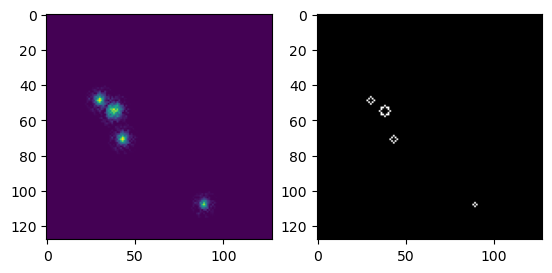

In [118]:
figure, axis = plt.subplots(1,2)
axis[0].imshow(y_pred[0,:,:,:])
axis[1].imshow(img[0,:,:,:])

In [119]:
#img = np.array(cv2.imread('./Images/'+'20'+'.png'))
img = np.array(cv2.imread('Example1_cor0.jpg'))
print(img.shape)
img = cv2.resize(img,(128,128))
img = np.expand_dims(img, axis=0)
img.shape

(900, 900, 3)


(1, 128, 128, 3)

In [120]:
y_pred = model.predict(img)
print(y_pred.max())

105.69116


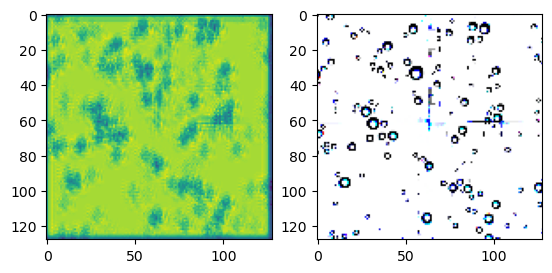

In [121]:
figure, axis = plt.subplots(1,2)
axis[0].imshow(y_pred[0,:,:,:])
axis[1].imshow(img[0,:,:,:])

In [25]:
y_pred.shape
cv2.imwrite(('./Images/predicted.png'), y_pred[0,:,:,:])

True